In [1]:
import pandas as pd
import numpy as np
pd.set_option('display.max_columns', None)
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.graphics.regressionplots import abline_plot

0.0002790665808080808
                            OLS Regression Results                            
Dep. Variable:        GESstandard_Min   R-squared:                       0.992
Model:                            OLS   Adj. R-squared:                  0.992
Method:                 Least Squares   F-statistic:                 1.097e+05
Date:                Sun, 06 Nov 2022   Prob (F-statistic):               0.00
Time:                        22:57:09   Log-Likelihood:                 5100.2
No. Observations:                 834   AIC:                        -1.020e+04
Df Residuals:                     832   BIC:                        -1.019e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0560    4.6e-

C:\Users\gunna\anaconda3\lib\site-packages\pandas\plotting\_matplotlib\core.py:677: UserWarning: The handle <matplotlib.collections.PathCollection object at 0x000001ED6E3ABCA0> has a label of '_nolegend_' which cannot be automatically added to the legend.
  ax.legend(handles, labels, loc="best", title=title)
C:\Users\gunna\anaconda3\lib\site-packages\pandas\plotting\_matplotlib\core.py:677: UserWarning: The handle <matplotlib.collections.PathCollection object at 0x000001ED6E3C7220> has a label of '_nolegend_' which cannot be automatically added to the legend.
  ax.legend(handles, labels, loc="best", title=title)
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


0.009867604560535023 +/- 2.9792571172529302e-05


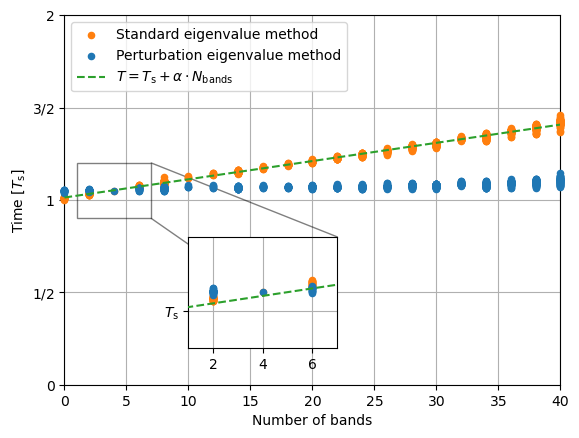

In [8]:
df=pd.read_csv("..//Data//TimingData//Data_for_fig_3_aws.csv")
fig,ax=plt.subplots()
#plt.rcParams.update({
#    "text.usetex": True,
#    "font.family": "sans-serif",
#    "font.sans-serif": ['Computer Modern Serif']})

#---Minimum time found---------------
T0=df[['GESstandard_Min','GESpert_Min']].min().min()


df[df['nBands']<41].plot.scatter(x='nBands',y='GESstandard_Min',ax=ax,color='C1',label='Standard eigenvalue method', zorder=10, clip_on=False)
df[df['nBands']<41].plot.scatter(x='nBands',y='GESpert_Min',ax=ax,color='C0',label='Perturbation eigenvalue method', zorder=10, clip_on=False)


se=df[df['nBands']<41].groupby("nBands").mean()['GESpert_Min'].copy()
ses=df[df['nBands']<41].groupby("nBands").mean()['GESstandard_Min'].copy()
se_y=T0*2*se.index/(3*66)+T0



X=df[df['nBands']<41]['nBands']
Y=df[df['nBands']<41]['GESstandard_Min']
X = sm.add_constant(X)
model = sm.OLS(Y, X)
results = model.fit()
pred_ols = results.get_prediction(X)
print(results.summary())


abline_plot(model_results=results,ax=ax,ls="dashed",color="C2",lw=1.5,zorder=20,label=r"$T=T_{\mathrm{s}}+\alpha\cdot N_{\mathrm{bands}}$")

axins = ax.inset_axes([0.25, 0.1, 0.3, 0.3])
df[(1<df['nBands']) & (df['nBands']<7)].plot.scatter(x='nBands',y='GESstandard_Min',ax=axins,color='C1', zorder=10, clip_on=False,label='_nolegend_')
df[(1<df['nBands']) & (df['nBands']<7)].plot.scatter(x='nBands',y='GESpert_Min',ax=axins,color='C0', zorder=10, clip_on=False,label='_nolegend_')

axins.plot(se.index,se_y,ls="dashed",color="C2",lw=1.5,zorder=20,label='_nolegend_')
# sub region of the original image
x1, x2, y1, y2 = 1, 7, 0.9*T0,1.2*T0
axins.set_xlim(x1, x2)
axins.set_ylim(y1, y2)
axins.set_yticks([T0,])
axins.set_yticklabels(["$T_{\mathrm{s}}$",])
axins.grid()

axins.set_xlabel('')
axins.set_ylabel('')
axins.get_legend().remove()
ax.indicate_inset_zoom(axins, edgecolor="black",label='_nolegend_')


ax.set_ylim(0,2*T0)
ax.set_yticks([0,0.5*T0,T0,1.5*T0,2*T0])
ax.set_yticklabels(["0", "$1/2$", "$1$", "$3/2$", "$2$"])
ax.set_xlim(0,40)
ax.set_xlabel("Number of bands")
ax.set_ylabel("Time $[T_{\mathrm{s}}]$")
ax.grid()
ax.legend(loc=2)

plt.savefig("..//Figures//bandnumber_comparison.eps")
plt.savefig("..//Figures//bandnumber_comparison.png")
print(results.params.nBands/T0,"+/-", results.bse.nBands/T0)